The MIT License (MIT)

Copyright (c) 2018 Bree Cummins

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.



In [1]:
import DSGRN
import graphviz

In [2]:
def is_FP(annotation):
    return annotation.startswith("FP")

def is_FP_match(state, annotation):
    digits = [int(s) for s in annotation.replace(",", "").split() if s.isdigit()]
    return all(digits[k] >= state[k][0] and digits[k] <= state[k][1] for k in state)


In [3]:
network = DSGRN.Network("AND_cyc_E.txt")
graph = graphviz.Source(network.graphviz())

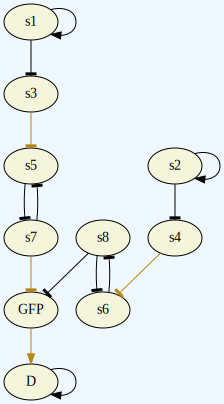

In [4]:
graph

In [5]:
FPs = [{"s1" : [2,2], "s2" : [0,0], "GFP" : [1,1]},{"s1" : [2,2], "s2" : [0,0], "GFP" : [0,0]}]
new_FPs = []
for bounds in FPs:
    new_bounds = {}
    for name,bds in bounds.items():
        new_bounds[network.index(name)]=bds
    new_FPs.append(new_bounds)
FPs = new_FPs

pg = DSGRN.ParameterGraph(network)

params = []
for k in range(pg.size()):
    param = pg.parameter(k)
    dg = DSGRN.DomainGraph(param)
    md = DSGRN.MorseDecomposition(dg.digraph())
    mg = DSGRN.MorseGraph(dg, md)
    stable_FP_annotations = [mg.annotation(i)[0] for i in range(0, mg.poset().size()) if is_FP(mg.annotation(i)[0]) and len(mg.poset().children(i)) == 0]
    if all(any([is_FP_match(states,a) for a in stable_FP_annotations]) for states in FPs):
        params.append(k)
print(len(params))
param.inequalities()


128


'{ "inequalities" : "L[s1,s1] < T[s1,s3] && T[s1,s1] < U[s1,s1] && 0 < T[s1,s3] < T[s1,s1] && 0 < L[s1,s1] < U[s1,s1] && L[s2,s2] < T[s2,s4] && T[s2,s2] < U[s2,s2] && 0 < T[s2,s4] < T[s2,s2] && 0 < L[s2,s2] < U[s2,s2] && L[s1,s3] < T[s3,s5] && T[s3,s5] < U[s1,s3] && 0 < T[s3,s5] && 0 < L[s1,s3] < U[s1,s3] && L[s2,s4] < T[s4,s6] && T[s4,s6] < U[s2,s4] && 0 < T[s4,s6] && 0 < L[s2,s4] < U[s2,s4] && L[s3,s5] L[s7,s5] < T[s5,s7] && T[s5,s7] < U[s3,s5] L[s7,s5] && T[s5,s7] < L[s3,s5] U[s7,s5] && T[s5,s7] < U[s3,s5] U[s7,s5] && 0 < T[s5,s7] && 0 < L[s3,s5] < U[s3,s5] && 0 < L[s7,s5] < U[s7,s5] && L[s4,s6] L[s8,s6] < T[s6,s8] && T[s6,s8] < U[s4,s6] L[s8,s6] && T[s6,s8] < L[s4,s6] U[s8,s6] && T[s6,s8] < U[s4,s6] U[s8,s6] && 0 < T[s6,s8] && 0 < L[s4,s6] < U[s4,s6] && 0 < L[s8,s6] < U[s8,s6] && L[s5,s7] < T[s7,GFP] && T[s7,s5] < U[s5,s7] && 0 < T[s7,GFP] < T[s7,s5] && 0 < L[s5,s7] < U[s5,s7] && L[s6,s8] < T[s8,GFP] && T[s8,s6] < U[s6,s8] && 0 < T[s8,GFP] < T[s8,s6] && 0 < L[s6,s8] < U[s6,s8] && L

In [6]:
from truth_table_fixed_pts import do_all_queries
sfile,pfile=do_all_queries("AND_cyc_E.db", "s1", 2, "s2", 2, out="GFP", topvalout=1, print_output=True)


Parameters with specified truth table: 160/256 = 62.50%

00 0
01 0
10 0
11 1

Parameters with specified truth table: 160/256 = 62.50%

00 0
01 1
10 1
11 1

Parameters with specified truth table: 128/256 = 50.00%

00 0
01 0
10 0
11 0

Parameters with specified truth table: 128/256 = 50.00%

00 0
01 1
10 0
11 1

Parameters with specified truth table: 128/256 = 50.00%

00 0
01 0
10 1
11 1

Parameters with specified truth table: 128/256 = 50.00%

00 1
01 1
10 1
11 1

Parameters with specified truth table: 64/256 = 25.00%

00 0
01 1
10 0
11 0

Parameters with specified truth table: 64/256 = 25.00%

00 0
01 0
10 1
11 0

Parameters with specified truth table: 64/256 = 25.00%

00 1
01 1
10 0
11 1

Parameters with specified truth table: 64/256 = 25.00%

00 1
01 0
10 1
11 1

Parameters with specified truth table: 32/256 = 12.50%

00 1
01 0
10 0
11 1

Parameters with specified truth table: 32/256 = 12.50%

00 0
01 1
10 1
11 0



In [7]:
help(DSGRN.ParameterGraph)

Help on class ParameterGraph in module DSGRN._dsgrn:

class ParameterGraph(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      ParameterGraph
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getstate__(...)
 |      __getstate__(self: DSGRN._dsgrn.ParameterGraph) -> tuple
 |  
 |  __init__(...)
 |      __init__(*args, **kwargs)
 |      Overloaded function.
 |      
 |      1. __init__(self: DSGRN._dsgrn.ParameterGraph) -> None
 |      
 |      2. __init__(self: DSGRN._dsgrn.ParameterGraph, arg0: DSGRN._dsgrn.Network) -> None
 |  
 |  __setstate__(...)
 |      __setstate__(self: DSGRN._dsgrn.ParameterGraph, arg0: tuple) -> None
 |  
 |  __str__(...)
 |      __str__(self: DSGRN._dsgrn.ParameterGraph) -> str
 |  
 |  adjacencies(...)
 |      adjacencies(self: DSGRN._dsgrn.ParameterGraph, arg0: int) -> List[int]
 |  
 |  dimension(...)
 |      dimension(self: DSGRN._dsgrn.ParameterGraph) -> int
 |  
 |  factorgra